# Na co bacha

Pracujeme tady s neúplnými daty, jsou tu možné biasy přispěvatelstva wikidat. Také nebereme ohled na složení KAPEL.

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

## Nejdřív: kolik je v žebříčku sólo interpretů

<Axes: xlabel='rok'>

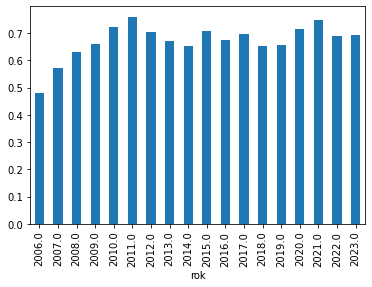

In [6]:
(df[df['velikost'] == 'člověk'].groupby('rok').size() / df[~df['velikost'].isnull()].groupby('rok').size()).plot.bar()

## Nýčko: nemuži x muži

<Axes: xlabel='rok'>

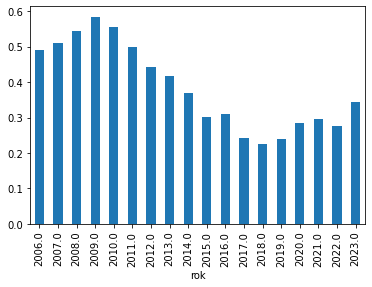

In [13]:
(df[(~df['gender'].isnull()) & (df['gender'] != 'muž')].groupby('rok').size() / df[~df['gender'].isnull()].groupby('rok').size()).plot.bar()

Hustý.

## Pozice

In [15]:
df[~df['gender'].isnull()].groupby('gender')['pozice'].mean()

gender
genderfluid    43.996086
muž            49.122019
nebinární      50.940541
žena           49.560581
Name: pozice, dtype: float64

In [16]:
df[~df['gender'].isnull()].groupby('gender')['pozice'].median()

gender
genderfluid    44.0
muž            48.0
nebinární      53.0
žena           49.0
Name: pozice, dtype: float64

In [9]:
df[df['pozice'] == 1].groupby('gender').size()

gender
genderfluid     27
muž            330
žena           215
dtype: int64

In [10]:
df[df['gender'] == 'genderfluid']['interpret_hlavni'].drop_duplicates()

38146    Miley Cyrus
59946    Demi Lovato
Name: interpret_hlavni, dtype: object

## Počty hitů na jednotlivce

In [23]:
pd.DataFrame(df[~df['gender'].isnull()].groupby('interpret_hlavni')['track'].nunique()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['track'].mean()

gender
genderfluid    11.500000
muž             3.025490
nebinární       4.000000
žena            3.955947
Name: track, dtype: float64

Ženy se v průměru prosadí 4 písničkami, muži 3, ale nic bych z toho nevyvozoval.

## Věk

In [24]:
df['vek'] = df['rok'] - df['datum_narozeni']

In [25]:
df.groupby('gender')['vek'].mean()

gender
genderfluid    24.986301
muž            32.969293
nebinární      25.372973
žena           29.218997
Name: vek, dtype: float64

Překvapivě blízko.

In [27]:
pd.DataFrame(df[~df['vek'].isnull()].groupby('interpret_hlavni')['vek'].min()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['vek'].mean()

gender
genderfluid    18.500000
muž            32.128141
nebinární      23.500000
žena           27.206030
Name: vek, dtype: float64

První zjevení se v hitparádě: ženy o 5 let dříve než muži.

In [28]:
pd.DataFrame(df[~df['vek'].isnull()].groupby('interpret_hlavni')['vek'].max()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['vek'].mean()

gender
genderfluid    31.000000
muž            35.929648
nebinární      29.000000
žena           31.527638
Name: vek, dtype: float64

Poslední zjevení se v hitparádě: ženy o 4 roky dříve než muži.